In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

In [4]:
file_path = "/Users/nicolasstelatto/Energizou Dropbox/Nicolas Stelatto/Mac/Documents/GitHub/Enriquecedor-de-CNPJs/Notebooks/data/cnpjs_enriquecidos_pronto.csv"
cnpjs = pd.read_csv(file_path, delimiter=";")
cnpjs.head()

,cnpj,data_abertura,situacao_fiscal,tipo,razao_social,porte,uf,capital_social,status,natureza_juridica,atividade_principal,atividade_secundaria_1,atividade_secundaria_2,atividade_secundaria_3,atividade_secundaria_4,atividade_secundaria_5,atividade_secundaria_6,atividade_secundaria_7,atividade_secundaria_8,atividade_secundaria_9,atividade_secundaria_10,atividade_secundaria_11,atividade_secundaria_12,atividade_secundaria_13,atividade_secundaria_14,atividade_secundaria_15,atividade_secundaria_16,atividade_secundaria_17,atividade_secundaria_18,atividade_secundaria_19,atividade_secundaria_20,atividade_secundaria_21,atividade_secundaria_22,atividade_secundaria_23,atividade_secundaria_24,atividade_secundaria_25,atividade_secundaria_26,atividade_secundaria_27,atividade_secundaria_28,atividade_secundaria_29,atividade_secundaria_30,atividade_secundaria_31,atividade_secundaria_32,atividade_secundaria_33,atividade_secundaria_34,atividade_secundaria_35,atividade_secundaria_36,atividade_secundaria_37,atividade_secundaria_38,atividade_secundaria_39,atividade_secundaria_40,atividade_secundaria_41,atividade_secundaria_42,atividade_secundaria_43,atividade_secundaria_44,atividade_secundaria_45,atividade_secundaria_46,atividade_secundaria_47,atividade_secundaria_48,atividade_secundaria_49,atividade_secundaria_50,atividade_secundaria_51,atividade_secundaria_52,atividade_secundaria_53,atividade_secundaria_54,atividade_secundaria_55,atividade_secundaria_56,atividade_secundaria_57,atividade_secundaria_58,atividade_secundaria_59,atividade_secundaria_60,atividade_secundaria_61,atividade_secundaria_62,atividade_secundaria_63,atividade_secundaria_64,atividade_secundaria_65,atividade_secundaria_66,atividade_secundaria_67,atividade_secundaria_68,atividade_secundaria_69,atividade_secundaria_70,atividade_secundaria_71,atividade_secundaria_72,atividade_secundaria_73,atividade_secundaria_74,atividade_secundaria_75,atividade_secundaria_76,atividade_secundaria_77,atividade_secundaria_78,atividade_secundaria_79,atividade_secundaria_80,atividade_secundaria_81,atividade_secundaria_82,atividade_secundaria_83,atividade_secundaria_84,atividade_secundaria_85,atividade_secundaria_86,atividade_secundaria_87,atividade_secundaria_88,atividade_secundaria_89,atividade_secundaria_90,atividade_secundaria_91,atividade_secundaria_92,atividade_secundaria_93,atividade_secundaria_94,atividade_secundaria_95,atividade_secundaria_96,atividade_secundaria_97,atividade_secundaria_98,atividade_secundaria_99
0,07.687.928/0001-35,11/11/2005,ATIVA,MATRIZ,WISH S.A.,DEMAIS,SP,734634785.00,OK,205-4 - Sociedade Anônima Fechada,55.10-8-01,56.11-2-03,56.11-2-01,96.01-7-01,68.22-6-00,70.20-4-00,47.53-9-00,47.54-7-01,47.63-6-02,47.81-4-00,47.72-5-00,47.59-8-99,47.89-0-01,78.10-8-00,85.99-6-04,79.90-2-00,82.19-9-99,82.30-0-01,82.30-0-02,93.11-5-00,93.19-1-01,90.01-9-01,90.01-9-02,90.01-9-03,90.01-9-04,90.01-9-99,93.29-8-99,74.20-0-04,43.30-4-02,64.63-8-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.642.131/0001-14,13/05/2011,ATIVA,MATRIZ,PARABONI MULTIFERRAMENTAS INDUSTRIA E COMERCIO...,DEMAIS,RS,36000000.00,OK,206-2 - Sociedade Empresária Limitada,25.43-8-00,25.39-0-02,46.72-9-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02.233.732/0001-57,13/10/1976,ATIVA,MATRIZ,COOPERATIVA MISTA DOS PRODUTORES RURAIS DO VAL...,DEMAIS,GO,0.00,OK,214-3 - Cooperativa,01.61-0-99,01.61-0-01,01.61-0-03,01.62-8-99,10.91-1-02,10.99-6-99,45.30-7

In [5]:
cnpjs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 110 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    cnpj                     114 non-null    object 
 1    data_abertura            114 non-null    object 
 2    situacao_fiscal          114 non-null    object 
 3    tipo                     114 non-null    object 
 4    razao_social             114 non-null    object 
 5    porte                    114 non-null    object 
 6    uf                       114 non-null    object 
 7    capital_social           114 non-null    float64
 8    status                   114 non-null    object 
 9    natureza_juridica        114 non-null    object 
 10   atividade_principal      114 non-null    object 
 11   atividade_secundaria_1   114 non-null    object 
 12   atividade_secundaria_2   67 non-null     object 
 13   atividade_secundaria_3   56 non-null     object 
 14   atividad

In [6]:
contagem_situacao_fiscal = cnpjs["situacao_fiscal"].value_counts()
contagem_situacao_fiscal

ATIVA      113
BAIXADA      1
Name: situacao_fiscal, dtype: int64

In [7]:
contagem_tipo = cnpjs["tipo"].value_counts()
contagem_tipo

MATRIZ    107
FILIAL      7
Name: tipo, dtype: int64

In [8]:
contagem_porte = cnpjs["porte"].value_counts()
contagem_porte

DEMAIS                      82
EMPRESA DE PEQUENO PORTE    17
MICRO EMPRESA               15
Name: porte, dtype: int64

In [9]:
contagem_estados = cnpjs["uf"].value_counts()
contagem_estados

SP    50
MG    15
AM    10
SC    10
RS     5
GO     4
PR     4
BA     3
RJ     3
SE     2
DF     2
PB     2
PA     1
RN     1
PE     1
ES     1
Name: uf, dtype: int64

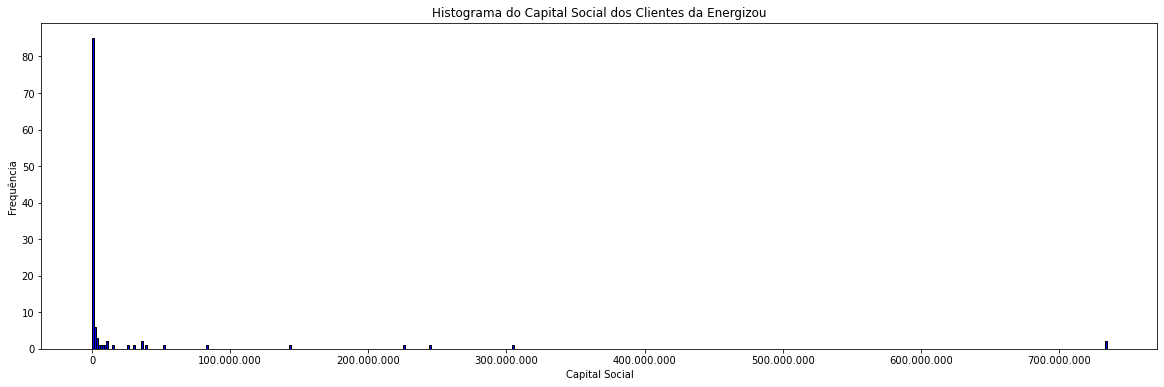

In [10]:
# Figura
plt.figure(figsize=(20,6))

# Dados
data = cnpjs["capital_social"]

# Plotando histograma
plt.hist(data, bins = 500, color="blue", edgecolor='black')

# Adicionando formatação de "." para milhares
def format_xticks(x, pos):
    return locale.format_string("%d", x, grouping=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(format_xticks))

# Personalização
plt.xlabel('Capital Social')
plt.ylabel('Frequência')
plt.title('Histograma do Capital Social dos Clientes da Energizou')
plt.show()

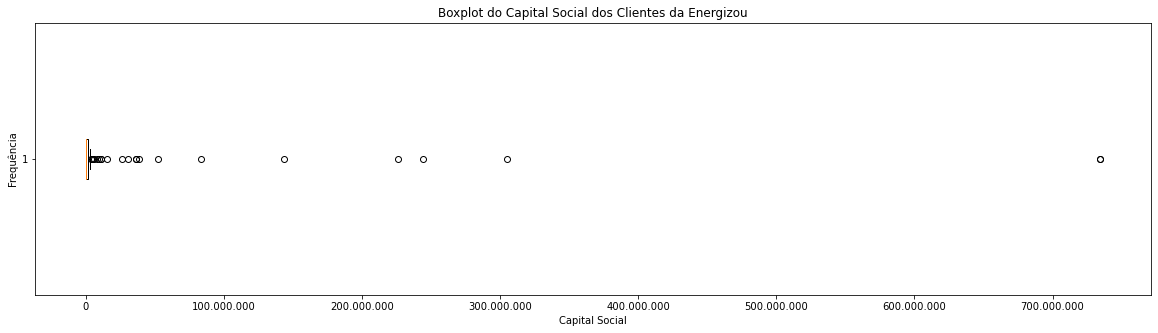

In [11]:
# Figura
plt.figure(figsize=(20,5))

# Dados
data = cnpjs["capital_social"]

# Plotando histograma
plt.boxplot(data, vert=False)

# Adicionando formatação de "." para milhares
def format_xticks(x, pos):
    return locale.format_string("%d", x, grouping=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(format_xticks))

# Personalização
plt.xlabel('Capital Social')
plt.ylabel('Frequência')
plt.title('Boxplot do Capital Social dos Clientes da Energizou')
plt.show()

In [12]:
#cnpjs["capital_social"].describe()
t = cnpjs["capital_social"].describe()
t

count         114.00
mean     24511992.48
std     105216211.58
min             0.00
25%             0.00
50%        100000.00
75%       1450000.00
max     734634785.00
Name: capital_social, dtype: float64

In [13]:
contagem_natureza_juridica = cnpjs["natureza_juridica"].value_counts()
contagem_natureza_juridica


#cnpjs["natureza_juridica_slice"] = cnpjs["natureza_juridica"].str.slice(0,6)
#cnpjs.head()

206-2 - Sociedade Empresária Limitada    73
308-5 - Condomínio Edilício              14
205-4 - Sociedade Anônima Fechada        13
399-9 - Associação Privada                5
213-5 - Empresário (Individual)           5
214-3 - Cooperativa                       2
204-6 - Sociedade Anônima Aberta          1
222-4 - Clube/Fundo de Investimento       1
Name: natureza_juridica, dtype: int64

In [37]:
# Criando novo DF com slice dos CNAEs primários e secundários
# cnae = "55.10-8-01"
# divisao = "55"
# grupo = "55.1"
# classe = "55.10-8"
# subclasse = "55.10-8/01"

cnaes_file_path = "/Users/nicolasstelatto/Energizou Dropbox/Nicolas Stelatto/Mac/Documents/GitHub/Enriquecedor-de-CNPJs/Notebooks/data/tabela_cnaes.csv"
tabela_divisao_cnaes = pd.read_csv(cnaes_file_path, delimiter=";")
tabela_divisao_cnaes["numero"] = tabela_divisao_cnaes["numero"].astype(str)
tabela_divisao_cnaes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numero   100 non-null    object
 1   secao    87 non-null     object
 2   divisao  87 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


In [52]:
def slice_cnae(df, df_cnaes_description):
    # Coping relevant CNAE columns from DF
    colunas_cnaes = df.columns[10:46]
    df_not_stacked = df[colunas_cnaes].copy()
    
    # Stacking all CNAEs ("Secundário" and "Primário") in one line
    series_stacked = df_not_stacked.stack()
    df_stacked = series_stacked.reset_index()
    df_stacked.columns = ["index", "tipo", "numero"]
    df_stacked = df_stacked[df_stacked["numero"] != "00"]
    
    # Slicing data to get the first 2 elements from a complete CNAE (the "Divisão" of the CNAE)
    df_stacked["numero"] = df_stacked["numero"].apply(lambda x: x[:2])
    
    # Changing "00" from number to NaN
    df_stacked["numero"] = df_stacked["numero"].replace("00", None)
    
    # Merging both df
    df_result = pd.merge(df_stacked, df_cnaes_description, left_on="numero", right_on="numero", how="inner")
    
    return df_result

In [53]:
contagem_cnaes_primario_e_secundario = slice_cnae(cnpjs, tabela_divisao_cnaes)
contagem_cnaes_primario_e_secundario.head()

,index,tipo,numero,secao,divisao
0,0,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
1,3,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
2,22,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
3,61,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
4,0,atividade_secundaria_1,56,ALOJAMENTO E ALIMENTAÇÃO,ALIMENTAÇÃO


In [55]:
contagem_cnaes_primario = contagem_cnaes_primario_e_secundario[contagem_cnaes_primario_e_secundario["tipo"] == "atividade_principal"]
contagem_cnaes_primario.head()
    
#contagem_cnaes["secao"].value_counts()

,index,tipo,numero,secao,divisao
0,0,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
1,3,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
2,22,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
3,61,atividade_principal,55,ALOJAMENTO E ALIMENTAÇÃO,ALOJAMENTO
14,58,atividade_principal,56,ALOJAMENTO E ALIMENTAÇÃO,ALIMENTAÇÃO


In [56]:
contagem_cnaes_primario_secao = contagem_cnaes_primario["secao"].value_counts()
contagem_cnaes_primario_secao

INDÚSTRIAS DE TRANSFORMAÇÃO                                         56
ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES                15
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS          10
ALOJAMENTO E ALIMENTAÇÃO                                             6
ARTES, CULTURA, ESPORTE E RECREAÇÃO                                  6
EDUCAÇÃO                                                             4
INFORMAÇÃO E COMUNICAÇÃO                                             3
ATIVIDADES IMOBILIÁRIAS                                              2
SAÚDE HUMANA E SERVIÇOS SOCIAIS                                      2
ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS RELACIONADOS           1
ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO     1
TRANSPORTE, ARMAZENAGEM E CORREIO                                    1
CONSTRUÇÃO                                                           1
Name: secao, dtype: int64

In [57]:
contagem_cnaes_primario_divisao = contagem_cnaes_primario["divisao"].value_counts()
contagem_cnaes_primario_divisao

SERVIÇOS PARA EDIFÍCIOS E ATIVIDADES PAISAGÍSTICAS                           15
FABRICAÇÃO DE PRODUTOS DE BORRACHA E DE MATERIAL PLÁSTICO                    10
FABRICAÇÃO DE PRODUTOS ALIMENTÍCIOS                                          10
COMÉRCIO VAREJISTA                                                            9
FABRICAÇÃO DE PRODUTOS QUÍMICOS                                               9
FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO METÁLICOS                              6
ATIVIDADES ESPORTIVAS E DE RECREAÇÃO E LAZER                                  6
FABRICAÇÃO DE MÁQUINAS, APARELHOS E MATERIAIS ELÉTRICOS                       4
ALOJAMENTO                                                                    4
EDUCAÇÃO                                                                      4
METALURGIA                                                                    3
FABRICAÇÃO DE BEBIDAS                                                         3
FABRICAÇÃO DE PRODUTOS DE METAL, EXCETO 